In [13]:
# First load in TNG dataset
import numpy as np
positions=np.load('/data/ohep2/MPIAData/SimData/100MSun/posteriorPDF.npy')

draws=positions[:100,:]

cubes=[]
abuns=[]
for i,params in enumerate(draws):
    if i%10==0:
        print i
    from Chempy.parameter import ModelParameters
    a=ModelParameters()
    from Chempy.cem_function import extract_parameters_and_priors
    from Chempy.wrapper import Chempy
    a2=extract_parameters_and_priors(params,a)
    _,abun=Chempy(a2)
    cubes.append(cube.cube)
    abuns.append(abun)

meds=np.median(positions,axis=0)
from Chempy.parameter import ModelParameters
a=ModelParameters()
from Chempy.cem_function import extract_parameters_and_priors
from Chempy.wrapper import Chempy
a2=extract_parameters_and_priors(meds,a)
cubeM,abunM=Chempy(a2)

np.savez('TNG100FreeFreeData.npz',median=abunM,abundances=abuns)

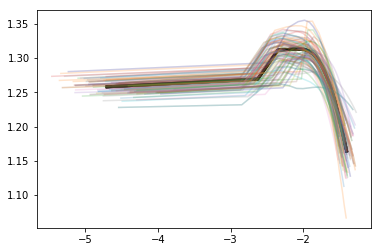

In [59]:
def wt_av(abun):
    return (16.*abun['O']+24.*abun['Mg']+28.*abun['Si'])/(16.+24.+28.)

plt.plot(abunM['Fe'],wt_av(abunM),lw=3,c='k')
for i in range(len(abuns)):
    ab=abuns[i]
    plt.plot(ab['Fe'],wt_av(ab),alpha=0.2,ls='-')
plt.show()